The goal of this notebook is to get you familiarized with convolutional neural networks. 

First, we will train a CNN model as our base model to solve the Image Colorization task.
In general, Image Colorization is a difficult problem e.g. a grayscale image, may have several valid coloring images.
After training, we will add some configurations to it to check their effect and then analyze it. 


## Packages and modules

In [1]:
# Pytorch library and other packages
import torch
from utils import *
from train import *

# Constants

In [ ]:
colours_dic_addr = 'car_colours_kmeans24.npy'
your_student_id = 0

# Dataset


## Prepare Dataset: cifar10

**CIFAR-10** is considered for this assignment which consists of images of size 32x32 pixels. For simplicity, one category of this dataset is considered (automobile).
The input and output of the network will be the grayscale image and RGB image respectively. by **running** the following code blocks get the dataset.

The subset of **24 colors** that are selected to colorize the grayscale images is provided in the car_colours_kmeans24.npy file.

In [3]:
# Download CIFAR dataset
(x_train, y_train), (x_test, y_test) = load_cifar10()

# LOAD THE COLOURS CATEGORIES
colours = np.load(colours_dic_addr, allow_pickle=True, encoding='bytes')

# Image Colorization 

### Training

Transforming data...
Epoch: 0
Train loss: 2.0830 Train acc: 0.3083
Val loss: 1.8314 Val acc: 0.3556


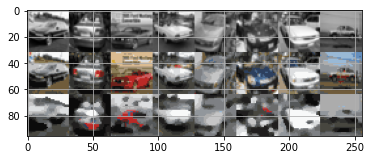

--------------
Epoch: 1
Train loss: 1.7702 Train acc: 0.3755
Val loss: 1.6728 Val acc: 0.4084


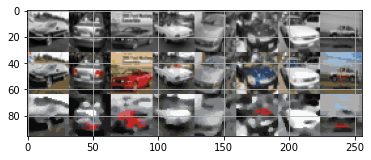

--------------
Epoch: 2
Train loss: 1.6874 Train acc: 0.3971
Val loss: 1.6199 Val acc: 0.4200


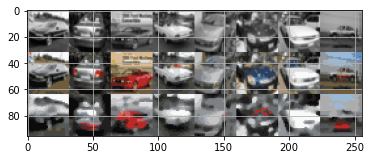

--------------
Epoch: 3
Train loss: 1.6382 Train acc: 0.4105
Val loss: 1.5855 Val acc: 0.4300


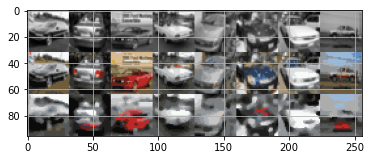

--------------
Epoch: 4
Train loss: 1.6027 Train acc: 0.4206
Val loss: 1.5616 Val acc: 0.4387


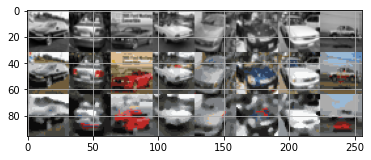

--------------
Epoch: 5
Train loss: 1.5751 Train acc: 0.4284
Val loss: 1.5436 Val acc: 0.4443


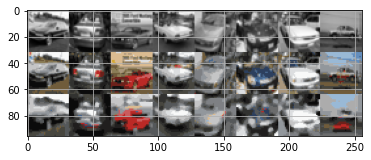

--------------
Epoch: 6
Train loss: 1.5524 Train acc: 0.4351
Val loss: 1.5315 Val acc: 0.4473


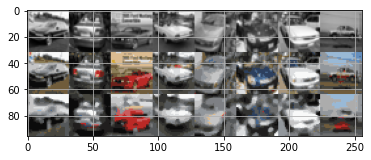

--------------
Epoch: 7
Train loss: 1.5326 Train acc: 0.4405
Val loss: 1.5232 Val acc: 0.4499


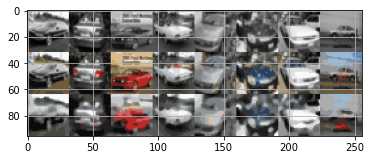

--------------
Epoch: 8
Train loss: 1.5147 Train acc: 0.4456
Val loss: 1.5177 Val acc: 0.4523


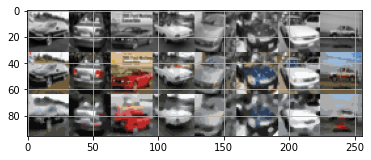

--------------
Epoch: 9
Train loss: 1.4974 Train acc: 0.4508
Val loss: 1.5169 Val acc: 0.4531


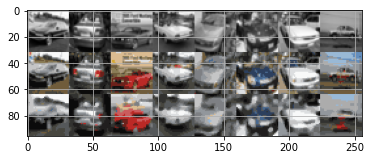

--------------
Epoch: 10
Train loss: 1.4812 Train acc: 0.4556
Val loss: 1.5176 Val acc: 0.4527


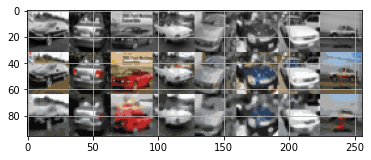

--------------
Epoch: 11
Train loss: 1.4652 Train acc: 0.4602
Val loss: 1.5221 Val acc: 0.4521


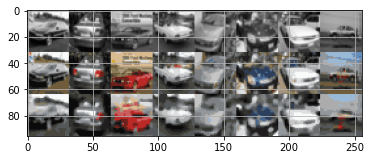

--------------
Epoch: 12
Train loss: 1.4499 Train acc: 0.4648
Val loss: 1.5306 Val acc: 0.4505


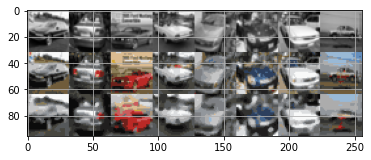

--------------
Epoch: 13
Train loss: 1.4347 Train acc: 0.4694
Val loss: 1.5395 Val acc: 0.4499


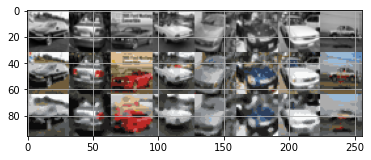

--------------
Epoch: 14
Train loss: 1.4204 Train acc: 0.4736
Val loss: 1.5489 Val acc: 0.4498


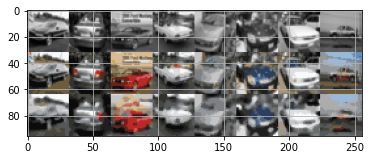

--------------
Early stopping!


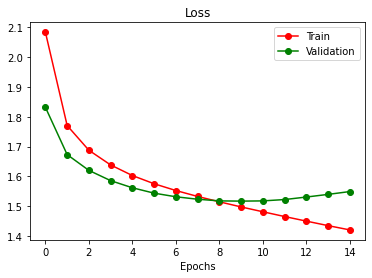

In [4]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
              'gpu':True, 
              'num_filters':64,
              'kernel_size':3,
              'num_colors':colours.shape[0],
              'seed':your_student_id,
              'category_id': 1,
              'experiment_name': "first",
              'downsize_input':False,
              'batch_size': 32,
              'learning_rate': 1e-3,
              'epochs' : 100,
              'checkpoint':False,
               'visualize': True, 
               'n_epochs_stop': 5
    
}
args.update(args_dict)

##############################################################################################
#                                 Call train function                                        #
##############################################################################################
model = train(args, x_train, y_train, x_test, y_test, colours, model_mode='base')


## Custom U-Net Model

# Skip connection 

A skip connection in a neural network is a connection which skips one or more layer and connects to a later layer. We will add skip connections to our base model.

We will add skip connection from first layer to last layer, second layer to the second last, etc. This type of skip connection was introduced by [Ronneberger et al.](https://arxiv.org/abs/1505.04597) in U-Net architecture.

The class of this model exists in <code>model.py</code> to complete.

<br>

<p align="center">
  <img src="images/U-Net.png">
</p>

## Training

Transforming data...
Epoch: 0
Train loss: 1.9522 Train acc: 0.3437
Val loss: 1.6287 Val acc: 0.4328


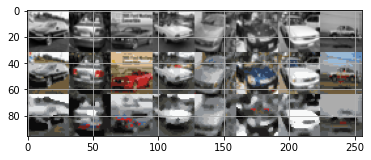

--------------
Epoch: 1
Train loss: 1.6084 Train acc: 0.4221
Val loss: 1.5055 Val acc: 0.4700


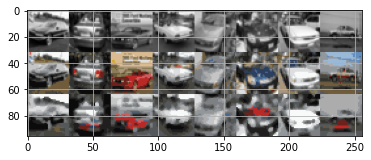

--------------
Epoch: 2
Train loss: 1.5263 Train acc: 0.4472
Val loss: 1.4437 Val acc: 0.4875


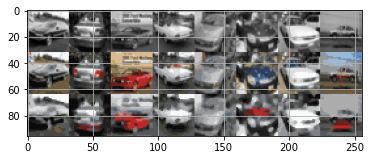

--------------
Epoch: 3
Train loss: 1.4701 Train acc: 0.4654
Val loss: 1.4013 Val acc: 0.5019


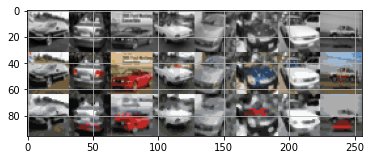

--------------
Epoch: 4
Train loss: 1.4263 Train acc: 0.4795
Val loss: 1.3818 Val acc: 0.5061


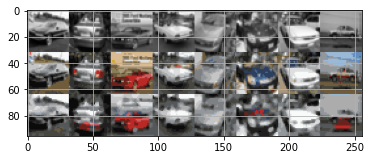

--------------
Epoch: 5
Train loss: 1.3897 Train acc: 0.4913
Val loss: 1.3759 Val acc: 0.5064


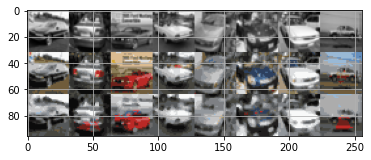

--------------
Epoch: 6
Train loss: 1.3587 Train acc: 0.5011
Val loss: 1.3781 Val acc: 0.5059


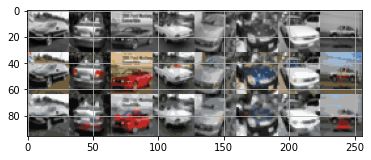

--------------
Epoch: 7
Train loss: 1.3304 Train acc: 0.5106
Val loss: 1.3775 Val acc: 0.5060


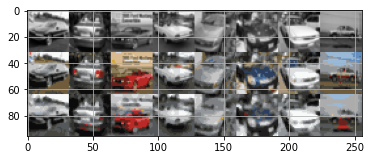

--------------
Epoch: 8
Train loss: 1.3036 Train acc: 0.5194
Val loss: 1.3639 Val acc: 0.5088


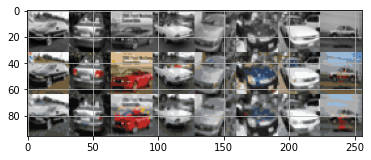

--------------
Epoch: 9
Train loss: 1.2779 Train acc: 0.5279
Val loss: 1.3792 Val acc: 0.5032


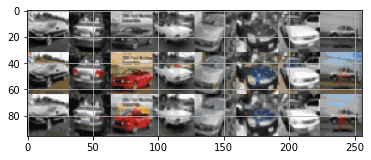

--------------
Epoch: 10
Train loss: 1.2533 Train acc: 0.5359
Val loss: 1.4044 Val acc: 0.4959


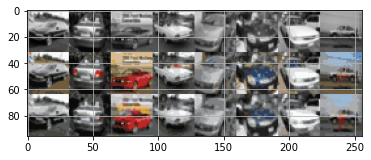

--------------
Epoch: 11
Train loss: 1.2296 Train acc: 0.5441
Val loss: 1.3848 Val acc: 0.5007


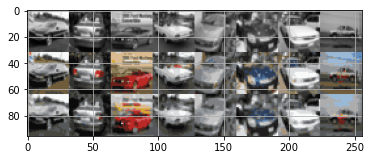

--------------
Epoch: 12
Train loss: 1.2051 Train acc: 0.5523
Val loss: 1.3267 Val acc: 0.5180


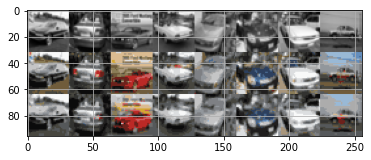

--------------
Epoch: 13
Train loss: 1.1809 Train acc: 0.5605
Val loss: 1.2809 Val acc: 0.5339


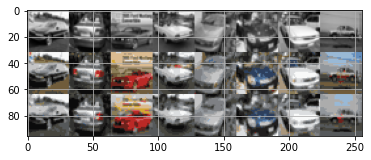

--------------
Epoch: 14
Train loss: 1.1575 Train acc: 0.5684
Val loss: 1.2629 Val acc: 0.5418


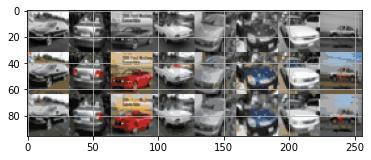

--------------
Epoch: 15
Train loss: 1.1347 Train acc: 0.5760
Val loss: 1.2661 Val acc: 0.5422


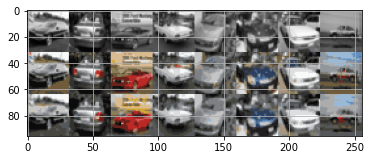

--------------
Epoch: 16
Train loss: 1.1121 Train acc: 0.5837
Val loss: 1.2761 Val acc: 0.5410


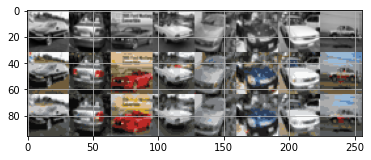

--------------
Epoch: 17
Train loss: 1.0903 Train acc: 0.5914
Val loss: 1.2754 Val acc: 0.5455


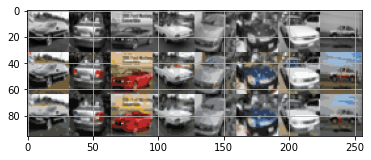

--------------
Epoch: 18
Train loss: 1.0707 Train acc: 0.5983
Val loss: 1.2989 Val acc: 0.5403


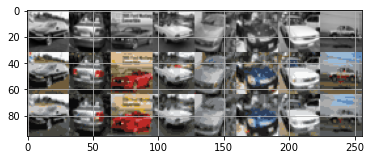

--------------
Epoch: 19
Train loss: 1.0571 Train acc: 0.6028
Val loss: 1.3149 Val acc: 0.5348


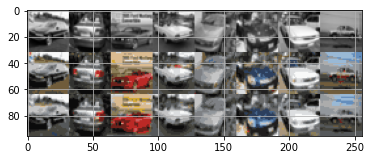

--------------
Early stopping!


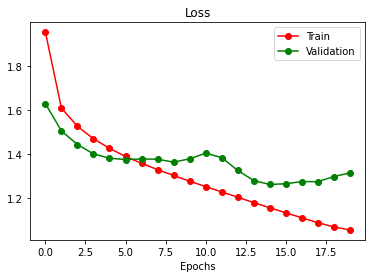

In [5]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':64,
              'kernel_size':3,
              'num_colors':colours.shape[0],
              'seed':your_student_id,
              'category_id': 1,
              'experiment_name': "first",
              'downsize_input':False,
              'batch_size': 32,
              'learning_rate': 1e-3,
              'epochs' : 100,
              'checkpoint':False,
               'visualize': True, 
               'n_epochs_stop': 5
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
model = train(args, x_train, y_train, x_test, y_test, colours, model_mode='U-Net')

# U-Net with Residual block

Based on the concept of Residual Learning, convert DownConv, UpConv and BottelNeck to Residual block.Then modify the `train` function to get result.

## Training

Transforming data...
Epoch: 0
Train loss: 1.9347 Train acc: 0.3461
Val loss: 1.6308 Val acc: 0.4235


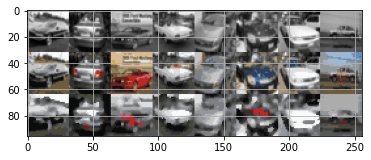

--------------
Epoch: 1
Train loss: 1.5852 Train acc: 0.4309
Val loss: 1.5400 Val acc: 0.4419


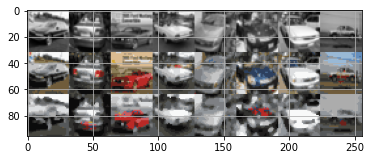

--------------
Epoch: 2
Train loss: 1.5166 Train acc: 0.4513
Val loss: 1.4683 Val acc: 0.4682


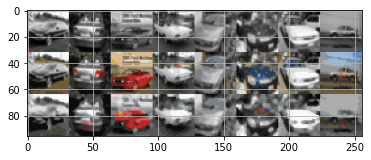

--------------
Epoch: 3
Train loss: 1.4768 Train acc: 0.4638
Val loss: 1.4512 Val acc: 0.4780


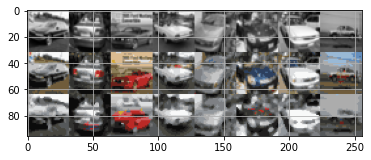

--------------
Epoch: 4
Train loss: 1.4496 Train acc: 0.4723
Val loss: 1.4101 Val acc: 0.4876


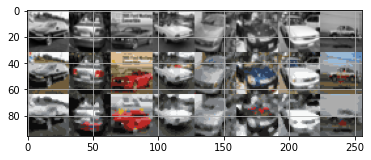

--------------
Epoch: 5
Train loss: 1.4256 Train acc: 0.4799
Val loss: 1.3913 Val acc: 0.4965


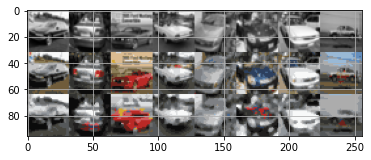

--------------
Epoch: 6
Train loss: 1.4034 Train acc: 0.4870
Val loss: 1.3743 Val acc: 0.5025


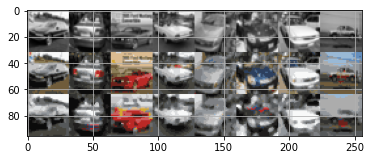

--------------
Epoch: 7
Train loss: 1.3811 Train acc: 0.4941
Val loss: 1.3682 Val acc: 0.5015


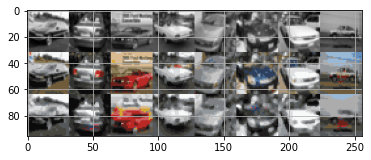

--------------
Epoch: 8
Train loss: 1.3566 Train acc: 0.5022
Val loss: 1.3493 Val acc: 0.5064


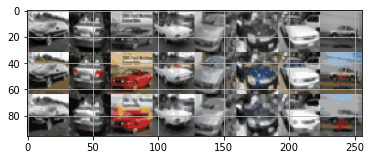

--------------
Epoch: 9
Train loss: 1.3319 Train acc: 0.5103
Val loss: 1.3553 Val acc: 0.5030


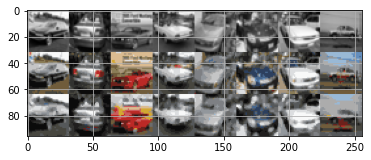

--------------
Epoch: 10
Train loss: 1.3067 Train acc: 0.5185
Val loss: 1.3457 Val acc: 0.5089


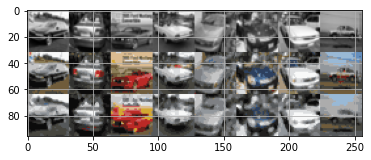

--------------
Epoch: 11
Train loss: 1.2817 Train acc: 0.5268
Val loss: 1.3029 Val acc: 0.5247


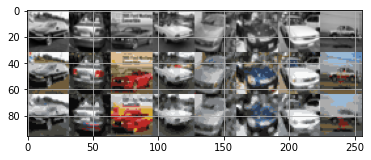

--------------
Epoch: 12
Train loss: 1.2579 Train acc: 0.5347
Val loss: 1.3509 Val acc: 0.5008


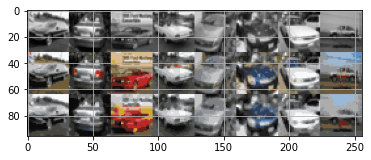

--------------
Epoch: 13
Train loss: 1.2333 Train acc: 0.5425
Val loss: 1.3615 Val acc: 0.4950


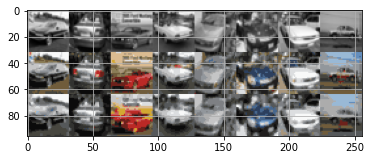

--------------
Epoch: 14
Train loss: 1.2065 Train acc: 0.5518
Val loss: 1.3748 Val acc: 0.4890


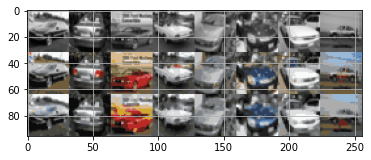

--------------
Epoch: 15
Train loss: 1.1852 Train acc: 0.5586
Val loss: 1.3829 Val acc: 0.4922


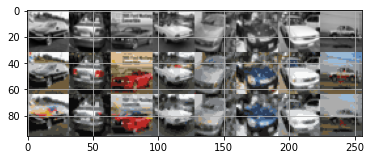

--------------
Epoch: 16
Train loss: 1.1595 Train acc: 0.5670
Val loss: 1.3392 Val acc: 0.5087


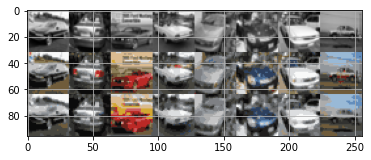

--------------
Early stopping!


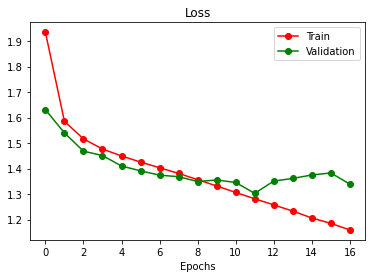

In [6]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'num_filters':64,
              'kernel_size':3,
              'num_colors':colours.shape[0],
              'seed':your_student_id,
              'category_id': 1,
              'experiment_name': "first",
              'downsize_input':False,
              'batch_size': 32,
              'learning_rate': 1e-3,
              'epochs' : 100,
              'checkpoint':False,
               'visualize': True, 
               'n_epochs_stop': 5
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
##############################################################################################
model = train(args, x_train, y_train, x_test, y_test, colours, model_mode='ResidualU-Net')

# Refrences

- https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
- http://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf
- Intro to optimization in deep learning: Busting the myth about batch normalization [[link](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/)]
- Why Does Batch Normalization Work? [[link](https://abay.tech/blog/2018/07/01/why-does-batch-normalization-work/)]
- https://arxiv.org/abs/1505.04597
